In [1]:
# we must know the experiment index, ideally also know the temperature
#Temper_i = 273.15 + 40
#Temp = 40.0
index_exp = 2

In [2]:
# magic lines that avoid re-start 
%load_ext autoreload
%autoreload 2

In [3]:
import pybamm as pb;import pandas as pd   ;import numpy as np;
import os; import seaborn as sns
import matplotlib.pyplot as plt;import os;import imageio
from scipy.io import savemat,loadmat;from pybamm import constants,exp;import matplotlib as mpl; fs=17; # or we can set import matplotlib.pyplot as plt then say 'mpl.rc...'
import openpyxl
import traceback
import multiprocessing
import scipy.optimize
import timeit
import random;import time, signal
fs=17; # python -m ipykernel install --user --name=EnvPBGEM_Linux --display-name "Python_Linux"
font = {'family' : 'DejaVu Sans','size'   : fs}
mpl.rc('font', **font)

In [4]:
# define global index and dict for all experiment data - prepare for read!
Exp_Path = [
    "Expt 1 - Si-based Degradation/",
    "Expt 2,2 - C-based Degradation 2/",
    "Expt 3 - Cathode Degradation and Li-Plating/",
    "Expt 4 - Drive Cycle Aging (Control)/",
    "Expt 5 - Standard Cycle Aging (Control)/",]
Exp_head = [
    "Expt 1",
    "Expt 2,2",
    "Expt 3",
    "Expt 4",
    "Expt 5",]
Exp_1_Cell = ["A","B","J","D","E","F","K","L","M"];
Exp_1_Temp = {
    "A":"10","B":"10","J":"10",
    "D":"25","E":"25","F":"25",
    "K":"40","L":"40","M":"40",}
Temp_Cell_Exp_1 = {
    "10":["A","B","J"],
    "25":["D","E","F"],
    "40":["K","L","M"],}
Exp_2_Cell = ["A","B","C","D","E","F"];
Exp_2_Temp = {
    "A":"10","B":"10",
    "C":"25","D":"25",
    "E":"40","F":"40",}
Temp_Cell_Exp_2 = {
    "10":["A","B"],
    "25":["C","D"],
    "40":["E","F"],}
Exp_3_Cell = ["A","B","C","D","E","F","G","H","I"];
Exp_3_Temp = {
    "A":"10","B":"10","C":"10",
    "D":"25","E":"25","F":"25",
    "G":"40","H":"40","I":"40"}
Temp_Cell_Exp_3 = {
    "10":["A","B","C"],
    "25":["D","E","F"],
    "40":["G","H","I"],}
Exp_4_Cell = ["A","B","C","D","E","F","G","H"];
Exp_4_Temp = {
    "A":"10","B":"10","C":"10",
    "D":"25","E":"25",
    "F":"40","G":"40","H":"40",}
Temp_Cell_Exp_4 = {
    "10":["A","B","C"],
    "25":["D","E",],
    "40":["F","G","H"],}
Exp_5_Cell = ["A","B","C","D","E","F","G","H"];
Exp_5_Temp = {
    "A":"10","B":"10","C":"10",
    "D":"25","E":"25",
    "F":"40","G":"40","H":"40",}
Temp_Cell_Exp_5 = {
    "10":["A","B","C"],
    "25":["D","E",],
    "40":["F","G","H"],}
Exp_All_Cell  = [Exp_1_Cell,Exp_2_Cell,Exp_3_Cell,Exp_4_Cell,Exp_5_Cell]
Exp_Temp_Cell = [Exp_1_Temp,Exp_2_Temp,Exp_3_Temp,Exp_4_Temp,Exp_5_Temp]
Temp_Cell_Exp_All = [Temp_Cell_Exp_1,Temp_Cell_Exp_2,Temp_Cell_Exp_3,Temp_Cell_Exp_4,Temp_Cell_Exp_5]
Mark_Cell_All = [
    {
    "A":"o","B":">","J":"v",
    "D":"o","E":">","F":"v",
    "K":"o","L":">","M":"v",},
    {
    "A":"10","B":"10",
    "C":"25","D":"25",
    "E":"40","F":"40",},
    {
    "A":"o","B":">","C":"v",
    "D":"o","E":">","F":"v",
    "G":"o","H":">","I":"v",},
    {
    "A":"o","B":">","C":"v",
    "D":"o","E":">",
    "F":"o","G":">","H":"v",},
    {
    "A":"o","B":">","C":"v",
    "D":"o","E":">",
    "F":"o","G":">","H":"v",}]
Color_Cell_All = [
    {
    "A":[2/255, 3/255, 226/255,0.7],"B":[2/255, 3/255, 226/255,0.7],"J":[2/255, 3/255, 226/255,0.7],
    "D":[0, 0, 0,0.7],"E":[0, 0, 0,0.7],"F":[0, 0, 0,0.7],
    "K":[1,0,0,0.4],"L":[1,0,0,0.4],"M":[1,0,0,0.4],},
    {
    "A":[2/255, 3/255, 226/255,0.7],"B":[2/255, 3/255, 226/255,0.7],
    "D":[0, 0, 0,0.7],"C":[0, 0, 0,0.7],
    "E":[1,0,0,0.4],"F":[1,0,0,0.4],},
    {
    "A":[2/255, 3/255, 226/255,0.7],"B":[2/255, 3/255, 226/255,0.7],"C":[2/255, 3/255, 226/255,0.7],
    "D":[0, 0, 0,0.7],"E":[0, 0, 0,0.7],"F":[0, 0, 0,0.7],
    "G":[1,0,0,0.4],"H":[1,0,0,0.4],"I":[1,0,0,0.4],},
    {
    "A":[2/255, 3/255, 226/255,0.7],"B":[2/255, 3/255, 226/255,0.7],"C":[2/255, 3/255, 226/255,0.7],
    "D":[0, 0, 0,0.7],"E":[0, 0, 0,0.7],
    "F":[1,0,0,0.4],"G":[1,0,0,0.4],"H":[1,0,0,0.4],},
    {
    "A":[2/255, 3/255, 226/255,0.7],"B":[2/255, 3/255, 226/255,0.7],"C":[2/255, 3/255, 226/255,0.7],
    "D":[0, 0, 0,0.7],"E":[0, 0, 0,0.7],
    "F":[1,0,0,0.4],"G":[1,0,0,0.4],"H":[1,0,0,0.4],}]


In [5]:
# ready experiment data
import sys  
str_path_0 = os.path.abspath(os.path.join(pb.__path__[0],'..'))
str_path_1 = os.path.abspath(os.path.join(str_path_0,"wip/Rio_Code/Fun_P2"))
sys.path.append(str_path_1) 
from Fun_P2 import * # directly do this for HPC
# Load Niall's data
Path_NiallDMA = os.path.expanduser("~/EnvPBGEM_Linux/SimSave/InputData/") 
Temp_Cell_Exp = Temp_Cell_Exp_All[index_exp-1] 
Exp_Any_AllData = Read_Exp(
    Path_NiallDMA,Exp_All_Cell[index_exp-1],
    Exp_Path,Exp_head,Exp_Temp_Cell[index_exp-1],
    index_exp-1)

Finish reading Experiment!


In [6]:
BasicPath = os.path.expanduser(
    "~/EnvPBGEM_Linux/SimSave/P2_R9_Dim/Simon_w_cr_h") # for Linux

workbook = openpyxl.Workbook() 
sheet = workbook.active  
excel_name = f"Summary of Simon_w_cr_h"
sheet_title = "Summary" 
sheet.title = sheet_title
workbook.save(BasicPath+f"/{excel_name}.xlsx" )

In [7]:
# Reload all scans  
Big_start = 1; Big_end = 600; case_no=10;
purpose_i = "Simon_w_cr_h"

Scan_start_all = (
    np.arange(Big_start,Big_end+1,case_no)
    ).tolist()
Scan_end_all = (
    np.arange(Big_start+case_no-1,Big_end+case_no,case_no)
    ).tolist()

# check whether all cases succeed, if so, it should contains a png file start with 0_Scan
def Check_all_succeed(Scan_start,Scan_end,BasicPath,purpose_i):
    # List all files in the folder 
    Target  = f'/{purpose_i}_Case_{Scan_start}_{Scan_end}/'  
    target_folder = BasicPath + Target
    #print(target_folder)
    files = os.listdir(target_folder)
    # Check if any file matches the criteria
    Flag_all_succeed = False
    for file_name in files:
        if file_name.endswith('.png') and '0_Scan' in file_name:
            Flag_all_succeed = True
            break
    if Flag_all_succeed:
        print(f"All cases succeed from {Scan_start} to {Scan_end}")
    else:
        print(f"Some cases failed from {Scan_start} to {Scan_end}")
    return Flag_all_succeed

def Plot_summary(Scan_start,Scan_end,Exp_Any_AllData,dpi,purpose_i):
    Indexs =np.arange(Scan_start-1,Scan_end)
    index_list = Indexs+1
    All_Scans = {}
    Target  = f'/{purpose_i}_Case_{Scan_start}_{Scan_end}/'  
    for scan in index_list:
        All_Scans[str(scan)]={}
        try:
            All_Scans[str(scan)] = loadmat( 
            BasicPath +Target 
            +  "Mats/" + str(scan)+ "-Ageing_summary_only.mat")
        except:
            print(f"Nothing in Scan {scan}")
    # plot
    Num_subplot = 5;
    fig, axs = plt.subplots(Num_subplot,1, figsize=(6,13),tight_layout=True)
    cm = mpl.cm.get_cmap("cool", len(index_list))  
    for i,scan in enumerate(index_list):
        try:
            axs[0].plot(
                All_Scans[str(scan)]['Throughput capacity [kA.h]'][0], 
                All_Scans[str(scan)]['CDend SOH [%]'][0],     
                '-o',color=cm(i), label="Scan=" + str(scan) ) # 
            axs[1].plot(
                All_Scans[str(scan)]['Throughput capacity [kA.h]'][0], 
                All_Scans[str(scan)]["CDend LLI [%]"][0],'-o',color=cm(i), )
            axs[2].plot(
                All_Scans[str(scan)]["Throughput capacity [kA.h]"][0], 
                All_Scans[str(scan)]["CDend LAM_ne [%]"][0],'-o',   color=cm(i),   ) 
            axs[3].plot(
                All_Scans[str(scan)]["Throughput capacity [kA.h]"][0], 
                All_Scans[str(scan)]["CDend LAM_pe [%]"][0],    '-o', color=cm(i),  ) 
            axs[4].plot(
                All_Scans[str(scan)]["Throughput capacity [kA.h]"][0], 
                np.array(All_Scans[str(scan)]["Res_0p5C_50SOC"][0]),   '-o', color=cm(i), )
        except:
            pass
        else:
            pass 
    # Plot Charge Throughput (A.h) vs SOH
    axs[0].set_ylabel("SOH %")
    axs[1].set_ylabel("LLI %")
    axs[2].set_ylabel("LAM NE %")
    axs[3].set_ylabel("LAM PE %")
    axs[4].set_ylabel(r"Lump resistance [m$\Omega$]")
    axs[4].set_xlabel("Charge Throughput (kA.h)")
    for i in range(0,Num_subplot):
        labels = axs[i].get_xticklabels() + axs[i].get_yticklabels(); 
        [label.set_fontname('DejaVu Sans') for label in labels]
        axs[i].tick_params(labelcolor='k', labelsize=fs, width=1) ;  del labels;
    axs[4].ticklabel_format(style='sci', axis='x', scilimits=(-1e-2,1e-2))
    #axs[0].legend(prop={'family':'DejaVu Sans','size':fs-10},loc='best',frameon=False)
    #axs[1].legend(prop={'family':'DejaVu Sans','size':fs-10},loc='best',frameon=False)
    fig.suptitle(
        f"0_Scan {index_list[0]}-{index_list[-1]}"
        +r"$^\circ$C - Summary", fontsize=fs+2)
    plt.savefig(
        BasicPath + Target +  
        f"0_Scan {index_list[0]}-{index_list[-1]} Summary.png", dpi=dpi)
    plt.close() 
    return

def Collect_1case_Excel(Scan_start,Scan_end,purpose_i):
    Indexs =np.arange(Scan_start-1,Scan_end)
    Index_List_succeed = Indexs+1
    Target  = f'/{purpose_i}_Case_{Scan_start}_{Scan_end}/'  
    purpose = f"{purpose_i}_Case_{Scan_start}_{Scan_end}"
    book_name_xlsx =  f'Summary_{purpose}.xlsx'
    sheet_name_xlsx = 'Output';
    for k,index_i in enumerate(Index_List_succeed):
        #print(index_i)
        try:
            old_book = str(index_i) + '_' + book_name_xlsx
            #print(old_book)
            #open excel:
            data_old = openpyxl.load_workbook(
                BasicPath + Target +   "Excel/" + old_book)   
            data_tar = openpyxl.load_workbook(
                BasicPath + Target+   book_name_xlsx) 

            table_old = data_old[str(index_i)]
            nrows_old = table_old.max_row  # 获得行数
            ncolumns_old = table_old.max_column  # 获得列数

            table_tar = data_tar[sheet_name_xlsx]
            nrows_tar = table_tar.max_row # ncolumns_old + k +1 # Mark!!! Most important changes!
            ncolumns_old = table_old.max_column  # 获得列数
            list_old = [];
            #print(nrows_old,nrows_tar)
            for i in range(1,nrows_old+1):
                for j in range(1,ncolumns_old+1):
                    list_old.append(table_old.cell(row=i,column=j).value)
            
            list_old = [list_old,]
            for i in range(1, len(list_old)+1):
                    for j in range(1, len(list_old[i-1])+1):
                        #print(i,j,list_old[i-1][j-1]    )
                        table_tar.cell(nrows_tar+i, j).value = list_old[i-1][j-1]     
            data_tar.save(
                BasicPath + Target
                + book_name_xlsx) 
            data_tar.close()
        except:
            print(f"Something goes wrong for Scan {index_i}!")
        else:
            print(f"Successfuly write results for Scan {index_i}!") 
    return

# save all results into the summary file
def Collect_multicases_excel(Scan_start,Scan_end,BasicPath,excel_name,sheet_title,purpose_i):
    # Open the source workbook
    #    purpose = "Latin_6para_200cases_narrow"
    Target  = f'/{purpose_i}_Case_{Scan_start}_{Scan_end}/'  
    purpose = f"{purpose_i}_Case_{Scan_start}_{Scan_end}"
    book_name_xlsx =  f'Summary_{purpose}.xlsx'
    source_workbook = openpyxl.load_workbook(
        filename=BasicPath +Target
        + book_name_xlsx)
    # Open the target workbook
    target_workbook = openpyxl.load_workbook(
        BasicPath+f"/{excel_name}.xlsx" )
    # Get the active sheet of the source workbook
    source_sheet = source_workbook.active
    # Get the target sheet by name
    target_sheet = target_workbook[sheet_title]

    # Copy the values and formatting from the source sheet to the target sheet
    if Scan_start==1:
        for row in source_sheet.iter_rows(values_only=True):
            target_sheet.append(row)
    else:
        for row in source_sheet.iter_rows(values_only=True):
            if row != next(source_sheet.iter_rows(values_only=True)):
                target_sheet.append(row)

    # Save the changes to the target workbook
    target_workbook.save(BasicPath+f"/{excel_name}.xlsx")
    print(f"Successfully collect Case_{Scan_start}_{Scan_end}")
    return 
# collect all results:
for Scan_start,Scan_end in zip(Scan_start_all,Scan_end_all):
    Flag_all_succeed = Check_all_succeed(Scan_start,Scan_end,BasicPath,purpose_i)
    if Flag_all_succeed:
        Collect_multicases_excel(Scan_start,Scan_end,BasicPath,excel_name,sheet_title,purpose_i)
    else:
        # first, plot summary
        Plot_summary(Scan_start,Scan_end,Exp_Any_AllData,100,purpose_i)
        # then collect single cases into a summary of the 10 cases
        Collect_1case_Excel(Scan_start,Scan_end,purpose_i)
        # finally, collect the 10 cases into a bigger file
        Collect_multicases_excel(Scan_start,Scan_end,BasicPath,excel_name,sheet_title,purpose_i)

Some cases failed from 1 to 10
Nothing in Scan 1
Nothing in Scan 2
Nothing in Scan 3
Nothing in Scan 5
Nothing in Scan 6
Nothing in Scan 7
Nothing in Scan 8
Nothing in Scan 9


/tmp/ipykernel_1507/3225245400.py:47: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm = mpl.cm.get_cmap("cool", len(index_list))


Something goes wrong for Scan 1!
Something goes wrong for Scan 2!
Something goes wrong for Scan 3!
Successfuly write results for Scan 4!
Something goes wrong for Scan 5!
Something goes wrong for Scan 6!
Something goes wrong for Scan 7!
Something goes wrong for Scan 8!
Something goes wrong for Scan 9!
Successfuly write results for Scan 10!
Successfully collect Case_1_10
Some cases failed from 11 to 20
Nothing in Scan 11
Nothing in Scan 12
Nothing in Scan 13
Nothing in Scan 14
Nothing in Scan 15
Nothing in Scan 16
Nothing in Scan 17
Nothing in Scan 18
Nothing in Scan 19
Nothing in Scan 20
Something goes wrong for Scan 11!
Something goes wrong for Scan 12!
Something goes wrong for Scan 13!
Something goes wrong for Scan 14!
Something goes wrong for Scan 15!
Something goes wrong for Scan 16!
Something goes wrong for Scan 17!
Something goes wrong for Scan 18!
Something goes wrong for Scan 19!
Something goes wrong for Scan 20!
Successfully collect Case_11_20
Some cases failed from 21 to 30
No

In [15]:
# collect all results:
# save all results into the summary file
def Collect_multicases_excel(Scan_start,Scan_end,BasicPath,excel_name,sheet_title,purpose_i):
    # Open the source workbook
    #    purpose = "Latin_6para_200cases_narrow"
    Target  = f'/{purpose_i}_Case_{Scan_start}_{Scan_end}/'  
    purpose = f"{purpose_i}_Case_{Scan_start}_{Scan_end}"
    book_name_xlsx =  f'Summary_{purpose}.xlsx'
    source_workbook = openpyxl.load_workbook(
        filename=BasicPath +Target
        + book_name_xlsx)
    # Open the target workbook
    target_workbook = openpyxl.load_workbook(
        BasicPath+f"/{excel_name}.xlsx" )
    # Get the active sheet of the source workbook
    source_sheet = source_workbook.active
    # Get the target sheet by name
    target_sheet = target_workbook[sheet_title]

    # Copy the values and formatting from the source sheet to the target sheet
    if Scan_start==1:
        for row in source_sheet.iter_rows(values_only=True):
            target_sheet.append(row)
    else:
        for row in source_sheet.iter_rows(values_only=True):
            if row != next(source_sheet.iter_rows(values_only=True)):
                target_sheet.append(row)

    # Save the changes to the target workbook
    target_workbook.save(BasicPath+f"/{excel_name}.xlsx")
    print(f"Successfully collect Case_{Scan_start}_{Scan_end}")
    return 
# collect all results:
for Scan_start,Scan_end in zip(Scan_start_all,Scan_end_all):
    Collect_multicases_excel(Scan_start,Scan_end,BasicPath,excel_name,sheet_title,purpose_i)

Successfully collect Case_1_10
Successfully collect Case_11_20
Successfully collect Case_21_30


In [20]:
# tidy up the 1000 cases - delete the rows with "Unknown" - should upgrade in the future to keep 
""" from openpyxl import load_workbook
workbook = load_workbook(filename=BasicPath+f"{excel_name}.xlsx")
sheet = workbook.active
# Convert rows to a list and iterate over it in reverse order
rows = list(sheet.iter_rows(values_only=True))
for row in reversed(range(len(rows))):
    if "Unknown" in rows[row]:
        sheet.delete_rows(row + 1)  # Delete the row
workbook.save(filename=BasicPath+f"{excel_name}.xlsx") """

In [9]:
# replot everything:
if not os.path.exists(BasicPath + "/Plots_collect"):
   os.mkdir(BasicPath + "/Plots_collect");
if not os.path.exists(BasicPath + "/Plots_collect/Allscans"):
   os.mkdir(BasicPath + "/Plots_collect/Allscans");

# cre
def Plot_summary2(Scan_start,Scan_end,dpi):
    Indexs =np.arange(Scan_start-1,Scan_end)
    index_list = Indexs+1
    All_Scans = {}
    Target  = f'/{purpose_i}_Case_{Scan_start}_{Scan_end}/'  
    for scan in index_list:
        All_Scans[str(scan)]={}
        try:
            All_Scans[str(scan)] = loadmat( 
            BasicPath + Target
            +  "Mats/" + str(scan)+ "-Ageing_summary_only.mat")
        except:
            print(f"Nothing in Scan {scan}")
    # plot
    Num_subplot = 5;
    fig, axs = plt.subplots(2,3, figsize=(15,7.8),tight_layout=True)
    cm = mpl.cm.get_cmap("cool", len(index_list))  
    for i,scan in enumerate(index_list):
        try:
            axs[0,0].plot(
                All_Scans[str(scan)]['Throughput capacity [kA.h]'][0], 
                All_Scans[str(scan)]['CDend SOH [%]'][0],     
                '-o',color=cm(i), label="Scan=" + str(scan) ) # 
            axs[0,1].plot(
                All_Scans[str(scan)]['Throughput capacity [kA.h]'][0], 
                All_Scans[str(scan)]["CDend LLI [%]"][0],'-o',color=cm(i), )
            axs[0,2].plot(
                All_Scans[str(scan)]["Throughput capacity [kA.h]"][0], 
                All_Scans[str(scan)]["CDend LAM_ne [%]"][0],'-o',   color=cm(i),   ) 
            axs[1,0].plot(
                All_Scans[str(scan)]["Throughput capacity [kA.h]"][0], 
                All_Scans[str(scan)]["CDend LAM_pe [%]"][0],    '-o', color=cm(i),  ) 
            axs[1,1].plot(
                All_Scans[str(scan)]["Throughput capacity [kA.h]"][0], 
                np.array(All_Scans[str(scan)]["Res_0p5C_50SOC"][0]),   '-o', color=cm(i), )
            axs[1,2].plot(
                All_Scans[str(scan)]["Throughput capacity [kA.h]"][1:], 
                np.array(All_Scans[str(scan)]["avg_Age_T"][1:]),   '-o', color=cm(i), )
        except:
            pass
        else:
            pass 
    # Plot Charge Throughput (A.h) vs SOH
    axs[0,0].set_ylabel("SOH %")
    axs[0,1].set_ylabel("LLI %")
    axs[0,2].set_ylabel("LAM NE %")
    axs[1,0].set_ylabel("LAM PE %")
    axs[1,1].set_ylabel(r"Lump resistance [m$\Omega$]")
    axs[1,2].set_ylabel(r"Avg age T [$^\circ$C]")
    axs[1,0].set_xlabel("Charge Throughput (kA.h)")
    axs[1,1].set_xlabel("Charge Throughput (kA.h)")
    axs[1,2].set_xlabel("Charge Throughput (kA.h)")
    axf = axs.flatten()
    for i in range(0,6):
        labels = axf[i].get_xticklabels() + axf[i].get_yticklabels(); 
        [label.set_fontname('DejaVu Sans') for label in labels]
        axf[i].tick_params(labelcolor='k', labelsize=fs, width=1);del labels
    axs[1,1].ticklabel_format(style='sci', axis='x', scilimits=(-1e-2,1e-2))
    axs[0,0].legend(prop={'family':'DejaVu Sans','size':fs-2},loc='best',frameon=False)
    fig.suptitle(
        f"Scan {index_list[0]}-{index_list[-1]}"
        +"Summary", fontsize=fs+2)
    plt.savefig(
        BasicPath + f"/Plots_collect/Allscans/" +  
        f"0_Scan {index_list[0]}-{index_list[-1]} Summary.png", dpi=dpi)
    plt.close() 
    return

for Scan_start,Scan_end in zip(Scan_start_all,Scan_end_all):
    Plot_summary2(Scan_start,Scan_end,dpi=300)
    

Nothing in Scan 1
Nothing in Scan 2
Nothing in Scan 3
Nothing in Scan 5
Nothing in Scan 6
Nothing in Scan 7
Nothing in Scan 8
Nothing in Scan 9


/tmp/ipykernel_1507/2358782592.py:24: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm = mpl.cm.get_cmap("cool", len(index_list))


Nothing in Scan 11
Nothing in Scan 12
Nothing in Scan 13
Nothing in Scan 14
Nothing in Scan 15
Nothing in Scan 16
Nothing in Scan 17
Nothing in Scan 18
Nothing in Scan 19
Nothing in Scan 20


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Nothing in Scan 24
Nothing in Scan 25
Nothing in Scan 26
Nothing in Scan 27
Nothing in Scan 28
Nothing in Scan 29
Nothing in Scan 30
Nothing in Scan 31
Nothing in Scan 32
Nothing in Scan 33
Nothing in Scan 34
Nothing in Scan 36
Nothing in Scan 38
Nothing in Scan 39
Nothing in Scan 40
Nothing in Scan 41
Nothing in Scan 42
Nothing in Scan 43
Nothing in Scan 44
Nothing in Scan 45
Nothing in Scan 46
Nothing in Scan 47
Nothing in Scan 50
Nothing in Scan 52
Nothing in Scan 53
Nothing in Scan 54
Nothing in Scan 55
Nothing in Scan 56
Nothing in Scan 57
Nothing in Scan 58
Nothing in Scan 59
Nothing in Scan 60
Nothing in Scan 62
Nothing in Scan 63
Nothing in Scan 65
Nothing in Scan 66
Nothing in Scan 67
Nothing in Scan 68
Nothing in Scan 69
Nothing in Scan 70
Nothing in Scan 71
Nothing in Scan 72
Nothing in Scan 74
Nothing in Scan 76
Nothing in Scan 77
Nothing in Scan 79
Nothing in Scan 80
Nothing in Scan 83
Nothing in Scan 87
Nothing in Scan 88
Nothing in Scan 89
Nothing in Scan 90
Nothing in S

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Nothing in Scan 121
Nothing in Scan 122
Nothing in Scan 123
Nothing in Scan 124
Nothing in Scan 125
Nothing in Scan 126
Nothing in Scan 127
Nothing in Scan 128
Nothing in Scan 129
Nothing in Scan 130
Nothing in Scan 131
Nothing in Scan 132
Nothing in Scan 133
Nothing in Scan 135
Nothing in Scan 136
Nothing in Scan 137
Nothing in Scan 139
Nothing in Scan 141
Nothing in Scan 142
Nothing in Scan 143
Nothing in Scan 144
Nothing in Scan 145
Nothing in Scan 146
Nothing in Scan 148
Nothing in Scan 149
Nothing in Scan 150
Nothing in Scan 151
Nothing in Scan 153
Nothing in Scan 155
Nothing in Scan 156
Nothing in Scan 158
Nothing in Scan 159
Nothing in Scan 160
Nothing in Scan 162
Nothing in Scan 163
Nothing in Scan 165
Nothing in Scan 166
Nothing in Scan 167
Nothing in Scan 168
Nothing in Scan 169
Nothing in Scan 172
Nothing in Scan 173
Nothing in Scan 174
Nothing in Scan 175
Nothing in Scan 176
Nothing in Scan 177
Nothing in Scan 178
Nothing in Scan 179
Nothing in Scan 180
Nothing in Scan 181


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Nothing in Scan 211
Nothing in Scan 212
Nothing in Scan 213
Nothing in Scan 214
Nothing in Scan 215
Nothing in Scan 216
Nothing in Scan 217
Nothing in Scan 218
Nothing in Scan 219
Nothing in Scan 220
Nothing in Scan 221
Nothing in Scan 222
Nothing in Scan 224
Nothing in Scan 225
Nothing in Scan 226
Nothing in Scan 227
Nothing in Scan 228
Nothing in Scan 229
Nothing in Scan 230
Nothing in Scan 231
Nothing in Scan 232
Nothing in Scan 233
Nothing in Scan 234
Nothing in Scan 236
Nothing in Scan 238
Nothing in Scan 239
Nothing in Scan 240
Nothing in Scan 241
Nothing in Scan 242
Nothing in Scan 243
Nothing in Scan 244
Nothing in Scan 245
Nothing in Scan 246
Nothing in Scan 247
Nothing in Scan 248
Nothing in Scan 250
Nothing in Scan 252
Nothing in Scan 253
Nothing in Scan 254
Nothing in Scan 255
Nothing in Scan 256
Nothing in Scan 257
Nothing in Scan 258
Nothing in Scan 259
Nothing in Scan 260
Nothing in Scan 262
Nothing in Scan 263
Nothing in Scan 265
Nothing in Scan 266
Nothing in Scan 267


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Nothing in Scan 321
Nothing in Scan 322
Nothing in Scan 323
Nothing in Scan 324
Nothing in Scan 325
Nothing in Scan 326
Nothing in Scan 327
Nothing in Scan 328
Nothing in Scan 329
Nothing in Scan 330
Nothing in Scan 331
Nothing in Scan 332
Nothing in Scan 333
Nothing in Scan 334
Nothing in Scan 335
Nothing in Scan 336
Nothing in Scan 337
Nothing in Scan 339


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Nothing in Scan 341
Nothing in Scan 342
Nothing in Scan 343
Nothing in Scan 344
Nothing in Scan 345
Nothing in Scan 346
Nothing in Scan 347
Nothing in Scan 348
Nothing in Scan 349
Nothing in Scan 350
Nothing in Scan 351
Nothing in Scan 352
Nothing in Scan 353
Nothing in Scan 355
Nothing in Scan 356
Nothing in Scan 358
Nothing in Scan 359
Nothing in Scan 360
Nothing in Scan 362
Nothing in Scan 363
Nothing in Scan 365
Nothing in Scan 366
Nothing in Scan 367
Nothing in Scan 368
Nothing in Scan 369
Nothing in Scan 370
Nothing in Scan 372
Nothing in Scan 373
Nothing in Scan 374
Nothing in Scan 375
Nothing in Scan 376
Nothing in Scan 377
Nothing in Scan 378
Nothing in Scan 379
Nothing in Scan 381
Nothing in Scan 382
Nothing in Scan 383
Nothing in Scan 384
Nothing in Scan 385
Nothing in Scan 387
Nothing in Scan 388
Nothing in Scan 389
Nothing in Scan 390
Nothing in Scan 391
Nothing in Scan 393
Nothing in Scan 394
Nothing in Scan 395
Nothing in Scan 397
Nothing in Scan 398
Nothing in Scan 399


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Nothing in Scan 421
Nothing in Scan 422
Nothing in Scan 424
Nothing in Scan 425
Nothing in Scan 426
Nothing in Scan 427
Nothing in Scan 428
Nothing in Scan 429
Nothing in Scan 430
Nothing in Scan 431
Nothing in Scan 432
Nothing in Scan 433
Nothing in Scan 434
Nothing in Scan 435
Nothing in Scan 436
Nothing in Scan 438
Nothing in Scan 439
Nothing in Scan 440
Nothing in Scan 441
Nothing in Scan 442
Nothing in Scan 443
Nothing in Scan 444
Nothing in Scan 445
Nothing in Scan 446
Nothing in Scan 447
Nothing in Scan 448
Nothing in Scan 450
Nothing in Scan 452
Nothing in Scan 453
Nothing in Scan 454
Nothing in Scan 455
Nothing in Scan 456
Nothing in Scan 457
Nothing in Scan 458
Nothing in Scan 459
Nothing in Scan 460
Nothing in Scan 462
Nothing in Scan 463
Nothing in Scan 465
Nothing in Scan 466
Nothing in Scan 467
Nothing in Scan 468
Nothing in Scan 469
Nothing in Scan 470
Nothing in Scan 471
Nothing in Scan 472
Nothing in Scan 473
Nothing in Scan 474
Nothing in Scan 476
Nothing in Scan 477


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Nothing in Scan 521
Nothing in Scan 522
Nothing in Scan 523
Nothing in Scan 524
Nothing in Scan 525
Nothing in Scan 526
Nothing in Scan 527
Nothing in Scan 528
Nothing in Scan 529
Nothing in Scan 530
Nothing in Scan 531
Nothing in Scan 532
Nothing in Scan 533
Nothing in Scan 534
Nothing in Scan 535
Nothing in Scan 536
Nothing in Scan 537
Nothing in Scan 539


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Nothing in Scan 541
Nothing in Scan 542
Nothing in Scan 543
Nothing in Scan 544
Nothing in Scan 545
Nothing in Scan 546
Nothing in Scan 547
Nothing in Scan 548
Nothing in Scan 549
Nothing in Scan 550
Nothing in Scan 551
Nothing in Scan 552
Nothing in Scan 553
Nothing in Scan 554
Nothing in Scan 555
Nothing in Scan 556
Nothing in Scan 558
Nothing in Scan 559
Nothing in Scan 560
Nothing in Scan 562
Nothing in Scan 563
Nothing in Scan 565
Nothing in Scan 566
Nothing in Scan 567
Nothing in Scan 568
Nothing in Scan 569
Nothing in Scan 570
Nothing in Scan 572
Nothing in Scan 573
Nothing in Scan 574
Nothing in Scan 575
Nothing in Scan 576
Nothing in Scan 577
Nothing in Scan 578
Nothing in Scan 579
Nothing in Scan 581
Nothing in Scan 582
Nothing in Scan 583
Nothing in Scan 584
Nothing in Scan 585
Nothing in Scan 587
Nothing in Scan 588
Nothing in Scan 589
Nothing in Scan 590
Nothing in Scan 591
Nothing in Scan 592
Nothing in Scan 593
Nothing in Scan 594
Nothing in Scan 595
Nothing in Scan 597


In [ ]:
# Post-processing - using ML knowledge
# Read the Excel file into a DataFrame
df = pd.read_excel(BasicPath+"/Summary of Exp2_Eact_SEI.xlsx",sheet_name="Case142")
df["SEI growth activation energy [J.mol-1]"]
df["Ageing temperature"]

In [25]:
column_mapping = {
    "SEI growth activation energy [J.mol-1]":"Eact",
    "Ageing temperature":"T",
}
# Rename the columns using the mapping   - Error_1~6;   Para_1~8
df = df.rename(columns=column_mapping)

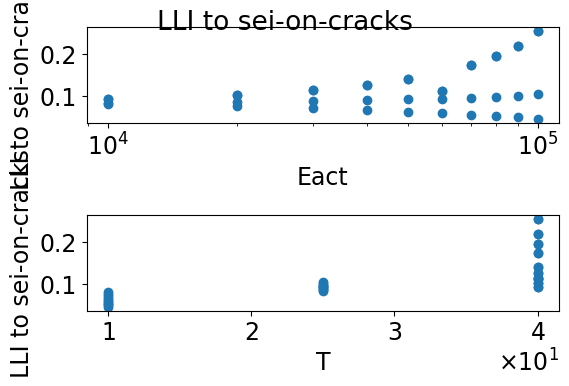

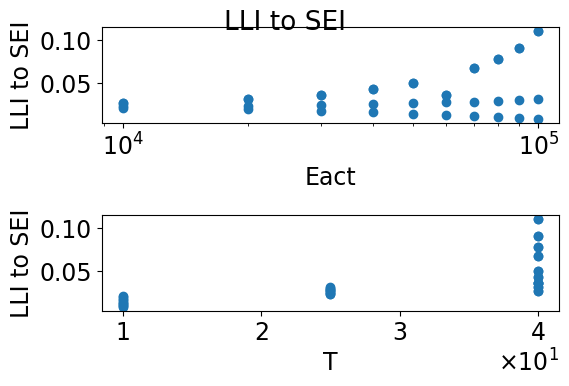

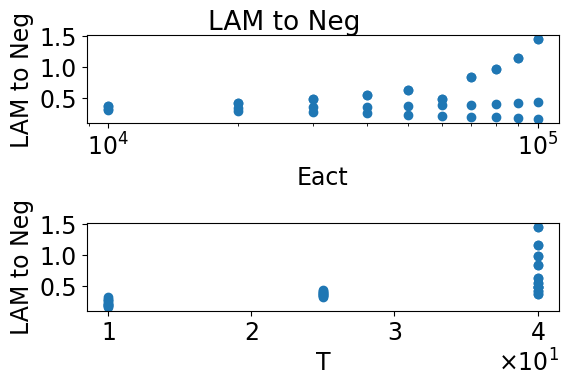

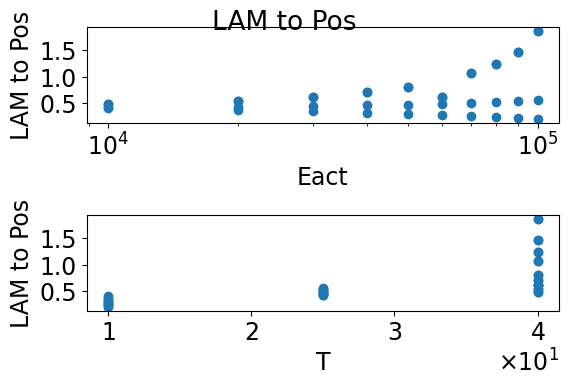

In [27]:
# relevant input:
input_columns = ["Eact","T"]
def Plot_Single_Out(df, input_columns, output_column):
    fig, axes = plt.subplots(2, 1, figsize=(6,4))
    #axes = axes.flatten()
    # Plot input-output relationship in subplots
    for i, column in enumerate(input_columns):
        ax = axes[i]
        ax.scatter(df[column], df[output_column])
        ax.set_xlabel(column)
        ax.set_ylabel(output_column)
        if i < len(input_columns) - 1:
            ax.set_xscale('log')
    ax_last = axes[-1]
    ax_last.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter(useMathText=True))
    ax_last.ticklabel_format(style='sci', axis='x', scilimits=(0, 0))
    plt.tight_layout()
    fig.suptitle(f"{output_column}", fontsize=fs+2)

#Plot_Single_Out(df,input_columns,output_column="Error Tot%")
Plot_Single_Out(df,input_columns,output_column="LLI to sei-on-cracks")
Plot_Single_Out(df,input_columns,output_column="LLI to SEI")
Plot_Single_Out(df,input_columns,output_column="LAM to Neg")
Plot_Single_Out(df,input_columns,output_column="LAM to Pos")

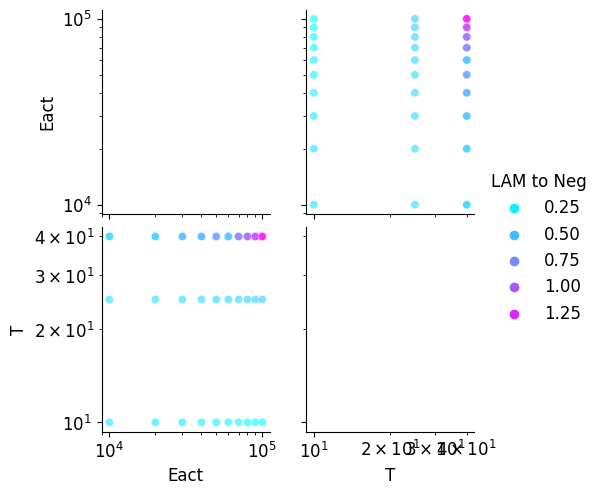

In [29]:
fs=12; # python -m ipykernel install --user --name=EnvPBGEM_Linux --display-name "Python_Linux"
font = {'family' : 'DejaVu Sans','size'   : fs}
mpl.rc('font', **font)
import seaborn as sns
def PlotPair(df, input_columns, output_column):
    # Create a DataFrame with only the input and output columns
    data_scale = df[input_columns + [output_column]]
    # Create the pair plot
    g = sns.pairplot(
        data_scale, vars=input_columns, hue=output_column,
        diag_kind='kde', plot_kws={'alpha': 0.6}, palette='cool')

    # Set x-axis and y-axis scales to log scale
    for ax in g.axes.flat:
        ax.set_xscale('log')
        ax.set_yscale('log')

    return

PlotPair(df, input_columns, output_column="LAM to Neg")


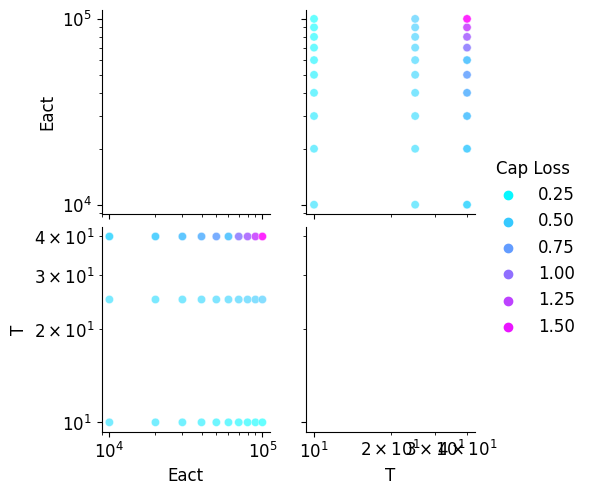

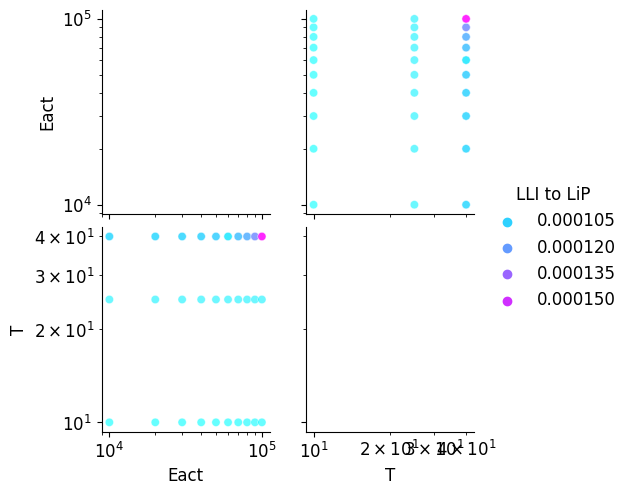

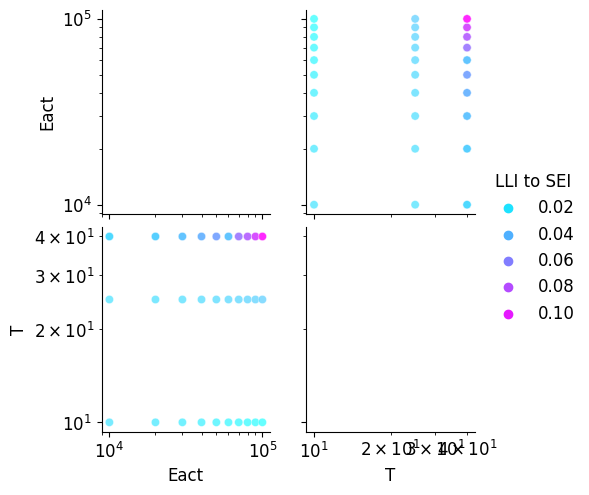

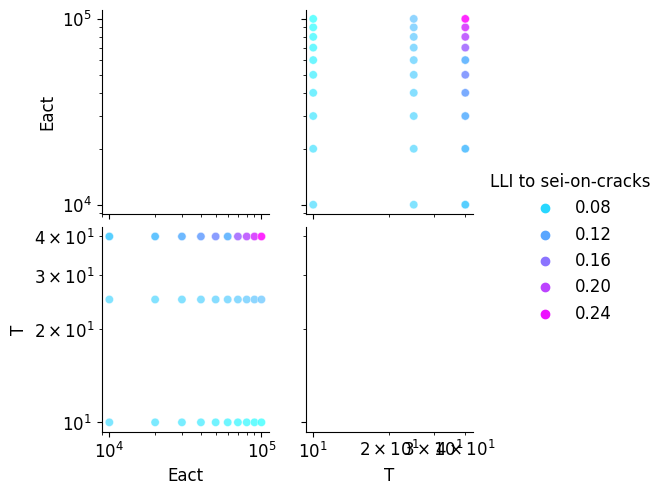

In [30]:
PlotPair(df, input_columns, output_column="Cap Loss")
PlotPair(df, input_columns, output_column="LLI to LiP")
PlotPair(df, input_columns, output_column="LLI to SEI")
PlotPair(df, input_columns, output_column="LLI to sei-on-cracks")

In [26]:
import pandas as pd

# Assuming your DataFrame is named 'df'
df['Pass'] = df['Error Tot%'].apply(lambda x: 1.0 if x < 200 else 0.0)


In [ ]:
PlotPair(df, ["Decay","k_LiP",], "Pass")